<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Assignment/Assignment221125_Keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PART 03 케라스(Keras)**

### **01 딥러닝 준비**


#### | **1-1 주요 용어**

##### **1-1-1 하이퍼파라미터(hyper-parameter)**
- 하이퍼파라미터는 딥러닝을 포함하여 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값이다.
- 사용자가 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라져, 하이퍼파라미터를 설정하는 것은 매우 중요하다. 
- 사용자가 별도로 설정하지 않으면, 기본값이 자동 적용된다.
- 하이퍼파라미터 튜닝 : 하이퍼파라미터의 값을 조절하는 행위
- 딥러닝 프로젝트 초기에는 튜닝에 많은 시간을 투자하는 것보다 마지막 단계에 진행하는 것을 추천한다.

##### **1-1-2 과소적합 vs. 과대적합(underfitting vs. overfitting)**
- 훈련용 데이터를 반복해서 학습하면 모델의 (학습 데이터에서의) 성능이 사람의 예측 성능을 뛰어 넘을 수도 있다. 
- 그러나 예측할 데이터의 분포가 학습 데이터와 다르거나 학습 데이터가 편향된 데이터였다면 모델의 **예측 성능이 현저히 저하**된다.
- **과소적합** : 모델이 충분히 학습되지 않아 예측 성능이 떨어지는 경우
- **과대적합** : 학습 데이터를 지나치게 반복 학습하여, 과하게 적합된 상태. 훈련 데이터에 존재하는 노이즈까지 모델에 반영되어, 예측 데이터에서의 성능이 크게 떨어진다.
- 이를 해결하기 위해, 훈련 데이터를 잘 구성하고, 훈련 데이터의 일부를 검증 데이터로 활용하여, 검증 성능이 가장 좋은 구간을 최종 모델을 결정한다.

##### **1-1-3 에포크(epoch)**
- 에포크(epoch) : 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)
- 사전에 설정된 최대 epoch 횟수까지 반복적으로 훈련한다.

##### **1-1-4 손실함수(loss function)**
- **손실 함수** : 예측 값과 정답 값의 차이, 즉 오차(Error)
- 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 한다.
- 이진 분류의 경우, `binary_crossentropy` 손실함수를 사용한다. 이는 출력츠으이 활성화 함수가 'sigmoid'인 경우를 말한다.
- 다중 분류의 경우, `categorical_crossentropy` 손실함수를 사용하며, 다중 분류의 대상이 되는 클래스가 원-핫 벡터인 경우 사용한다. 그렇지 않다면(예 : 0, 1, 2, 3, $\cdots$) `sparse_categorical_crossentropy` 손실함수를 사용한다. 출력함수로는 softmax를 이용한다.
- 회귀 모델의 경우, MSE나 MAE, Huber 등을 이용한다.
- 다음과 같이 손실함수를 지정하여 사용한다.
```python
import tensorflow as tf
# 클래스 형태로 지정
tf.keras.losses.BinaryCrossentropy()
# 함수 형태로 지정
tf.keras. losses.binary_crossentropy
```

##### **1-1-5 경사 하강법(gradient descent)**
- **경사하강법** : 딥러닝 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법이다.
- 경사하강법을 넘파이(NumPy)로 직접 구현해보자.
  1. 손실 함수를 적용한다.
  2. 단순선형회귀 수식이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 경사하강법으로 구하는 과정을 구현한다.
  3. 샘플 데이터셋을 생성하는 함수를 정의하고, 임의의 w와 b 값을 지정하여 주어진 x에 대한 y 값을 생성한다. y 값을 생성할 때 약간의 노이즈를 추가한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 생성 함수
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # 약간의 노이즈 추가
    yy = y + noise

    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

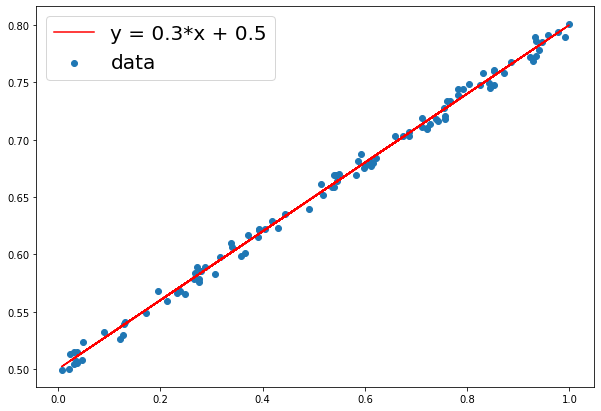

w: 0.3, b: 0.5


In [ ]:
# 샘플 데이터셋 생성
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

- 이제 경사하강법 알고리즘의 핵심인 w와 b에 대한 그래디언트를 구하는 부분을 구현하자.
- 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감한다.

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.69265, b = 0.24165 error = 1.32577
 5 w = 0.64535, b = 0.30528 error = 0.55506
10 w = 0.59208, b = 0.33542 error = 0.39707
15 w = 0.54697, b = 0.36077 error = 0.28418
20 w = 0.50884, b = 0.38219 error = 0.20351
25 w = 0.47661, b = 0.40030 error = 0.14587
30 w = 0.44937, b = 0.41561 error = 0.10468
35 w = 0.42633, b = 0.42856 error = 0.07525
40 w = 0.40686, b = 0.43950 error = 0.05422
45 w = 0.39041, b = 0.44874 error = 0.03919
50 w = 0.37649, b = 0.45656 error = 0.02845
55 w = 0.36473, b = 0.46317 error = 0.02078
60 w = 0.35479, b = 0.46876 error = 0.01529
65 w = 0.34639, b = 0.47348 error = 0.01137
70 w = 0.33929, b = 0.47747 error = 0.00857
75 w = 0.33328, b = 0.48084 error = 0.00657
80 w = 0.32820, b = 0.48370 error = 0.00514
------------------------------------------------------------
81 w = 0.3, b = 0.5 error = 0.00491


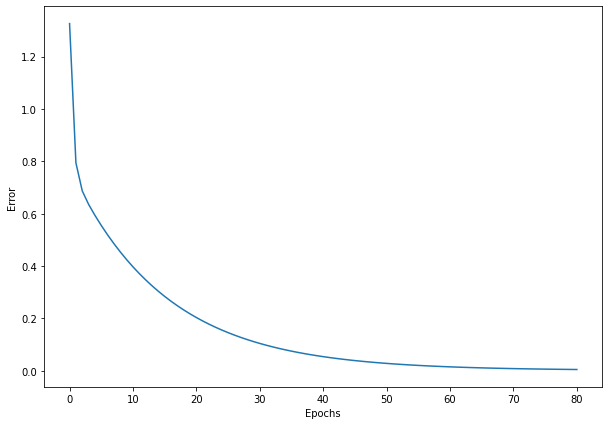

In [ ]:
# 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

#### | **1-2 딥러닝 프로세스**
- 데이터 로드
- 데이터 전처리(피처 가공, 피처 선택, 피처 추출)
- 데이터 분할
- 모델 생성 및 컴파일
- 훈련
- 검증
- 하이퍼파라미터 튜닝 후 모델 생성 및 컴파일 단계부터 검증 단계까지 다시 진행
- 예측

##### **1-2-1 데이터 전처리**
- 모델 훈련 전 데이터를 가공하는 단계
- 데이터셋의 종류와 문제 유형에 따라 방법이 다양하다.
- 배열의 차원을 변경하거나 스케일을 조정할 수 있다.

##### **1-2-2 모델 생성**
- 모델의 구조를 정의하고 생성하는 단계
- 순차적 구조의 모델은 Sequential API로, 다중 입력 및 출력 등 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing 방법으로 구현할 수 있다.

##### **1-2-3 모델 컴파일**
- 생성된 모델 훈련에 사용한 손실함수, 옵티마이저, 평가지표 등을 정의
- 모델 인스턴스에 `compile()` 메소드를 적용하고 위의 속성 값을 설정한다.

##### **1-2-4 모델 훈련**
- 모델을 훈련하는 단계
- `fit()` 함수에 모델 훈련에 필요한 훈련 데이터셋, 검증 데이터셋을 입력하고, epoch, batch 크기 및 콜백 함수 등을 지정한다.

##### **1-2-5 모델 검증**
- 훈련이 완료된 모델을 검증하는 단계
- 모델을 훈련할 때 **사용하지 않은** 검증 데이터셋을 모델에 입력하고 평가 지표를 계산한다.
- 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델을 수정하고 재평가하는 과정을 목표 성능에 도달할 때까지 반복한다.

##### **1-2-6 모델 예측**
- 훈련과 검증이 완료된 모델로 테스트셋에 대해 예측

### **02 단순 신경망 훈련**

#### | **2-1 선형 회귀**
- 회귀 분석 : 하나 이상의 독립 변수들이 종속 변수에 미치는 영향을 추정하는 통계 기법
- 그 중 단순선형회귀(simple linear regression) 모형은 하나의 X가 Y에 미치는 영향을 추정하며, 1차 함수 관계로 나타낼 수 있다.
$$y = ax + b$$
- 텐서플로 케라스를 활용하여 딥러닝으로 단순선형회귀 모델을 직접 만들어보자

#### | **2-2 뉴런(Neuron)**
- 뉴런은 인공 신경망 모델을 구성하는 하나의 신경을 의미한다.
- 노드(node)라고도 한다.
- 신경망은 여러 개의 레이어로 이루어져 있으며 1개의 레이어는 1개 이상의 뉴런으로 구성된다.

#### | **2-3 Dense 레이어**
- Dense 레이어는 심층 신경망 모델을 구성하는 가장 기본 레이어이다.
- 각 레이어와 레이어 사이에 모든 뉴런이 연결되어 있어 완전 연결층(Fully Connected Layer)라고 부른다.
- 다음과 같이 노드의 개수와 활성화 함수를 지정하여 사용할 수 있다.
```python
import tensorflow as tf
# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)
# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')
```

#### | **2-4 데이터셋 만들기**
- 넘파이의 `arrange()` 메소드를 이용하여 5개의 순차적인 x 데이터를 생성하고 이를 1차 함수인 $y= 3x + 2$에 대입하여 y 데이터 5개를 생성한다.

In [ ]:
# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2

In [ ]:
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


- 생성한 데이터를 그래프로 시각화해보자.

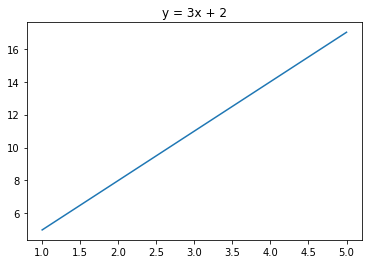

In [ ]:
# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

#### | **2-5 Sequential API**
- 앞에서 언급한 것처럼 간단한 구조의 딥러닝 모델은 케라스의 Sequantial API를 이용하여 만들 수 있다.
- **Sequantial API** : 층을 이어 붙이듯 순서에 맞게 일렬로 연결하는 방식

##### **2-5-1 모델 구조**
1. **리스트형 정의**
  - Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력한다.
  - 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 다음 층의 연산을 수행한다.
  ```python
  import tensorflow as tf
  # 리스트형
  model = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(5),
          tf.keras.layers.Dense(1)
          ])
  ```
2. **add 함수로 레이어 추가**
  - Sequential 클래스 객체 생성 후, 모델 객체에 층을 추가하는 방식
  - `add()` 메소드는 1개의 층을 추가할 수 있다.
  ```python
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Dense(5))
  model.add(tf.keras.layers.Dense(1))
  ```

##### **2-5-2 단순선형회귀 모델 정의**
- 단순선형회귀에서 입력 변수는 1개이기 때문에, Dense 레이어 생성 시 `input_shape=[1]`로 지정한다.
- 1개의 뉴런을 가지는 Dense 레이어는 1개의 출력값을 가지므로, 출력값은 y에 대한 모델의 예측 값이다.

In [ ]:
import tensorflow as tf
 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
        ])

#### | **2-6 모델 요약**
- Sequential API로 모델을 만들었따면 `model.summary()`로 모델의 요약을 확인할 수 있다.
- 모델의 구조, 층별 노드의 개수 등을 확인할 수 있다.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### | **2-7 컴파일**
- 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실 함수, 그리고 평가지표 등을 정의한다.
- 클래스 인스턴스로 지정할 경우, 학습률, 모멘텀 등의 하이퍼 파라미터를 사용자가 직접 지정할 수도 있다.

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


- 옵티마이저는 확률적 경사하강법, 손실함수는 MSE, 평가 지표는 MAE로 지정하여 모델을 훈련시켜보자.

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### | **2-8 훈련**
- 생성된 모델 인스턴스에 `fit()` 메소드를 적용하면, 데이터를 입력하여 모델을 훈련할 수 있다.
- **'모델을 훈련한다.'** : 가중치를 업데이트

In [ ]:
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 546ms/step - loss: 121.6208 - mae: 10.3091
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 70.9725 - mae: 7.9149
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 41.4566 - mae: 6.0871
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 24.2555 - mae: 4.6916
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 14.2309 - mae: 3.6262


- 5 epoch의 훈련이 끝난 후, loss는 14.2309, mae는 3.6262를 기록했따.
- 위 학습에서는 모델의 예측 오차가 점점 줄어드는 것을 보아, 과소 적합되었을 가능성이 있다.
- 이번에는 epoch을 1200으로 지정하여 충분히 훈련시킨다.

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
        ])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 319ms/step - loss: 172.4930 - mae: 12.2184
Epoch 2/1200
1/1 [==============================] - 0s 9ms/step - loss: 100.5923 - mae: 9.3660
Epoch 3/1200
1/1 [==============================] - 0s 13ms/step - loss: 58.6917 - mae: 7.1884
Epoch 4/1200
1/1 [==============================] - 0s 12ms/step - loss: 34.2736 - mae: 5.5259
Epoch 5/1200
1/1 [==============================] - 0s 12ms/step - loss: 20.0435 - mae: 4.2567
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 11.7504 - mae: 3.2876
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 6.9171 - mae: 2.5478
Epoch 8/1200
1/1 [==============================] - 0s 10ms/step - loss: 4.1000 - mae: 1.9828
Epoch 9/1200
1/1 [==============================] - 0s 8ms/step - loss: 2.4579 - mae: 1.5514
Epoch 10/1200
1/1 [==============================] - 0s 8ms/step - loss: 1.5005 - mae: 1.2220
Epoch 11/1200
1/1 [==============================] -

- 훈련에 대한 결과가 저장된 history 변수를 사용하여 epoch 별 훈련 손실 및 평가 지표를 시각화해보자.

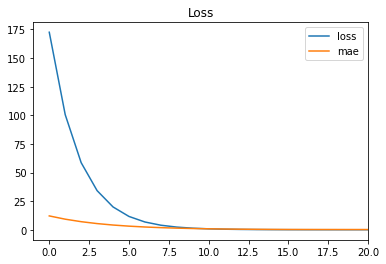

In [ ]:
# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')

plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()

plt.show()

#### | **2-9 검증**
- 모델 인스턴스의 `evaluate()` 메서드로 모델의 성능을 검증할 수 있다.
- 일반적으로 검증 데이터셋을 입력하여 진행한다.
- 다만 이번 예제에서는 별도의 검증 데이터셋을 만들지 않았으므로, 훈련 데이터셋의 x, y를 대입하여 반환되는 결과를 확인한다.

In [ ]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 136ms/step - loss: 5.1725e-05 - mae: 0.0062


[5.172508463147096e-05, 0.006173038389533758]

#### | **2-10 예측**
- 훈련이 완료된 모델 인스턴스의 `predict()` 메소드에 새로운 입력 데이터를 넣어, 모델의 예측값을 입력해보자.

In [ ]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 165ms/step


array([[32.029835]], dtype=float32)

### **03 심층신경망으로 이미지 분류**

#### | **3-1 케라스 내장 데이터셋 로드**
- 케라스는 모델 훈련에 필요한 샘플 데이터셋을 제공한다. 데이터셋은 `tensorflow.keras.datasets`에 위치한다.
  - `bostion_housing` : 보스턴 주택 가격 데이터셋(회귀)
  - `cifar10` : CIFAR10 이미지 분류 데이터셋(분류)
  - `cifar100` : CIFAR100 이미지 분류 데이터셋(분류) 
  - `mnist` : mnist 손글씨 데이터셋(분류)
  - `fashion_mnist` : 의류 데이터셋(분류)
  - `imdb` : IMDb 영화 데이터셋(분류)
  - `reuters` : Reuters 뉴스 토픽(분류)
- 케라스의 datasets 패키지에 있는 데이터는 `load_data()` 메소드를 이용하여 불러올 수 있다.


In [22]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [23]:
# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


- 훈련 데이터셋과 검증 데이터셋의 크기를 확인해보자.

In [24]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


- 훈련 데이터셋은 60,000개의 데이터가, 검증 데이터셋은 10,000개의 데이터가 저장되어 있다.
- 28, 28은 이미지의 세로와 가로 픽셀 크기를 의미한다.
- 이미지를 시각화해보자.

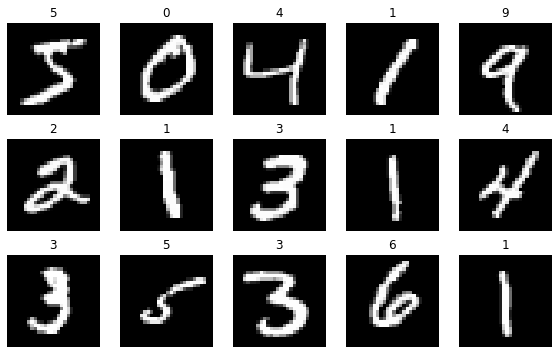

In [25]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

#### | **3-2 데이터 전처리**
- 이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절하자.
- 배열의 각 원소는 이미지를 구성하는 하나의 픽셀값이다.

In [26]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

- 데이터가 0~1 사이의 값이 되도록 정규화한다.

In [27]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
# test 셋(검증셋)에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [29]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

#### | **3-3 Flatten 레이어**
- 정규화가 끝난 `x_train`의 크기는 여전히 (60000, 28, 28)이다.
- 샘플 이미지의 형태는 (28, 28)로 2차원 입력 데이터로 볼 수 있다. 그러나 Dense 레이어는 2차원 데이터를 입력받지 못해, 다음과 같이 데이터를 1차원으로 변환해주어야 한다.

In [30]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


- 또는 Flatten 레이어를 이용하여 1차원으로 만들어 줄 수도 있다.

In [31]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


#### | **3-4 활성화 함수**
- **활성화 함수(Activation Function)** : 입력을 비선형 출력으로 변환해주는 함수
- 자주 사용되는 활성화 함수로는 시그모이드, tanh, ReLU, Leaky ReLU 등이 있다.
- 아래와 같이 Dense 레이어에 ReLU 활성화 함수를 적용할 수 있다.
```python
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')
```
- 혹은 다음과 같이 별도의 클래스로 적용할 수도 있다.
```python
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
    ])
```

#### | **3-5 입력과 출력**
- 딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 `input_shape` 매개변수를 지정하는 것이 일반적이다.
- 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 한다. mnist의 경우 10개의 클래스로 이루어져 있으므로 마지막 출력층의 노드 개수는 10개이어야 한다.

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 

    # 노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
    ])

- 출력층의 노드 개수가 2개 이상인 경우, 즉 다중 분류 문제에서는 softmax 함수를 적용한다.
- 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid를 적용할 수 있다.
```python
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')
# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')
```

#### | **3-6 손실함수**
- 분류 모델의 손실 함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야 모델이 정상적으로 훈련할 수 있다.
- 출력 노드가 1개, sigmoid 활성화 함수를 적용한 경우
```python
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')
```
- 출력 노드가 2개 이상, softmax 활성화 함수를 적용한 경우
```python
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')
# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')
```

#### | **3-7 옵티마이저**
- **옵티마이저(optimizer)** : 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
- 일반적으로 Adam이 많이 사용된다.
- 케라스에서 지원하는 옵티마이저 : SGD, Adam, Adagrad, Nadam, RMSprop, Adadelta, Adamax, Ftrl
- 다음과 같이 옵티마이저를 지정할 수 있다.
```python
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)
# 문자열로 지정
model.compile(optimizer='adam')
```

#### | **3-8 평가지표**
- 분류 모델에 대한 평가 지표 : 정확도(`accuracy`), `auc`, `precision`, `recall` 등
- metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있다.

In [34]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [33]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#### | **3-9 훈련**
- 모델을 훈련할 때 검증 데이터셋을 추가로 지정한다. 
- 매 epoch마다 훈련 손실과 검증 손실, 각 데이터셋에 대한 평가지표를 나란히 출력한다.

In [35]:
# 훈련
model.fit(x_train, y_train,       
          validation_data=(x_test, y_test), # 검증셋 지정
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2362 - sparse_categorical_accuracy: 0.9302 - val_loss: 0.1270 - val_sparse_categorical_accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0989 - sparse_categorical_accuracy: 0.9698 - val_loss: 0.0887 - val_sparse_categorical_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0672 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.0794 - val_sparse_categorical_accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0493 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0834 - val_sparse_categorical_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - sparse_categorical_accuracy: 0.9866 - val_loss: 0.0805 - val_sparse_categorical_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0325 - sp

#### | **3-10 평가**
- 10회의 epoch이 끝나고 훈련이 종료된 뒤, `evaluate()` 메서드로 모델을 검증하고 평가 결과를 확인할 수 있다.
- 이때, 검증 데이터셋을 이용한다.

In [36]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1010 - sparse_categorical_accuracy: 0.9789
검증셋 정확도: 0.9789000153541565


#### | **3-11 예측**
- 훈련된 모델로 새로운 이미지에 대한 분류 값을 예측할 수 있다.
- `predict()` 메서드를 이용한다.

In [37]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [38]:
# 예측 결과 출력
predictions[0]

array([4.0893552e-12, 4.1164228e-07, 1.0683686e-08, 2.4297886e-10,
       3.8475028e-09, 6.3633508e-11, 8.4217123e-15, 9.9999958e-01,
       2.9689817e-10, 5.3783516e-08], dtype=float32)

- 넘파이의 `argmax`를 이용해 가장 높은 확률값을 가지는 클래스를 확인해볼 수 있다.

In [39]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


- 예측한 결과를 시각화해보자.

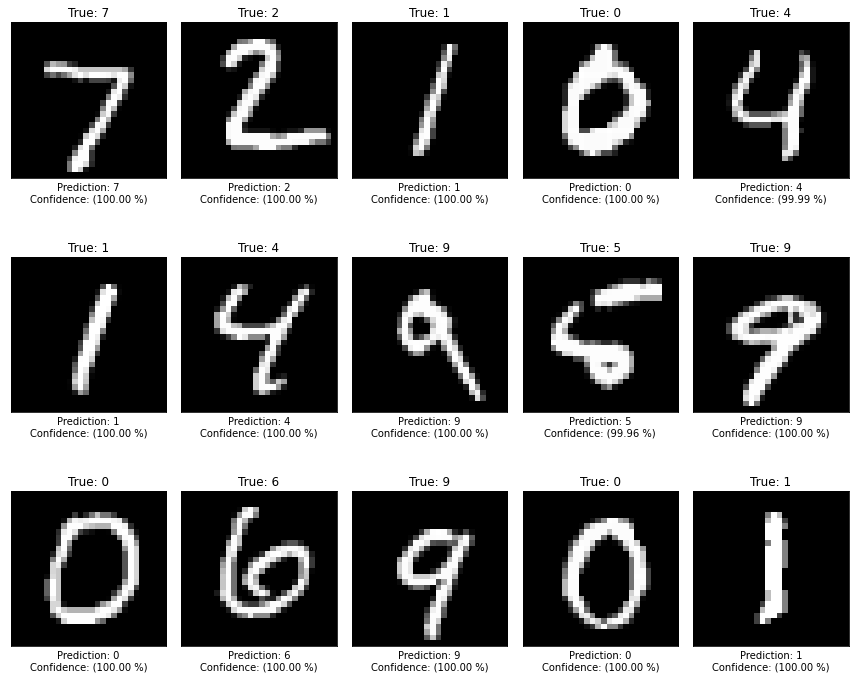

In [40]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

### **04 모델 세부 설정**

In [41]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


#### | **4-1 초기값 설정**
- 레이어의 초기화 방법을 다르게 설정할 수 있다.
- Dense 레이어는 기본값으로 Glorot Uniform 초기화 방법이 설정되어 있다.

In [42]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

- `kernal_initializer` 매개변수를 설정하면 초기화 방법을 변경할 수 있다.
- 역시 옵티마이저나 손실함수처럼 문자열로 지정하거나 클래스 인스턴스로 지정할 수 있다.

In [43]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}


In [44]:
# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}


#### | **4-2 규제(Regularization)**
- 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다.
- `kernel_regularizer`를 설정하여 적용할 수 있다.

In [45]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_10',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [46]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


#### | **4-3 드롭아웃(Dropout)**
- 딥러닝 모델은 층이 넓고 깊어질 때, 과대적합 문제가 발생하는데 드롭아웃은 이 문제를 해결하기 위해 제안된 아이디어로, 상당히 좋은 효과를 보이고 있다.
- 노드의 일부 신호를 임의로 삭제하여, 모델이 학습하는 가중치 파라미터의 개수를 줄이는 방식이다.

In [47]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

#### | **4-4 배치 정규화(Batch Normalization)**
- 배치 정규화는 각 층에서 활성화 함수를 통과하기 전, 미니 배치의 스케일을 정규화한다.
- 보다 안정적인 훈련이 가능하고, 성능을 크게 향상시킬 수 있다.
- 배치 정규화를 적용하지 않은 모델을 `model_a`, 적용한 모델을 `model_b`로 지정하여 성능 비교를 해보자.

In [48]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

#### | **4-5 활성화(activation) 함수**
- 다음과 같이 클래스 인스턴스로 선언하면, 활성화 함수의 하이퍼파라미터 값을 변경하여 적용할 수 있다.

In [50]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [51]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

- 앞에서 생성한 2개의 모델과 LeakyReLU 활성화 함수로 변경한 모델을 동일한 조건으로 10 epoch 훈련한 후, 수렴 속도를 확인해보자.

In [ ]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2920 - accuracy: 0.9148 - val_loss: 0.1659 - val_accuracy: 0.9496
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1343 - accuracy: 0.9595 - val_loss: 0.1335 - val_accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0977 - accuracy: 0.9703 - val_loss: 0.1015 - val_accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0779 - accuracy: 0.9763 - val_loss: 0.0956 - val_accuracy: 0.9694
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9795 - val_loss: 0.0941 - val_accuracy: 0.9714
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0910 - val_accuracy: 0.9717
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9847 - val_loss: 0.0951 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()